In [13]:
# initialisatie
import cbsodata
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(10, 6)}); sns.set_style('ticks')

identifier = '82316NED'


## Preview of the dataset


In [67]:
data = pd.DataFrame(cbsodata.get_data(identifier))
data.head()

AllePersonenIngestroomdInDeWW_1       BaansituatieBijStartWWUitkering  \
0                         369650.0  Totaal bij start van de WW-uitkering   
1                         348170.0  Totaal bij start van de WW-uitkering   
2                         346370.0  Totaal bij start van de WW-uitkering   
3                         422410.0  Totaal bij start van de WW-uitkering   
4                         502690.0  Totaal bij start van de WW-uitkering   

  BaansituatieOpPeilmoment  ID InstroomEnPeilmoment Leeftijdklassen Perioden  \
0                   Totaal   0    Op instroommoment          Totaal     2009   
1                   Totaal   1    Op instroommoment          Totaal     2010   
2                   Totaal   2    Op instroommoment          Totaal     2011   
3                   Totaal   3    Op instroommoment          Totaal     2012   
4                   Totaal   4    Op instroommoment          Totaal     2013   

   PersonenMetAOZWVoorInstroom_3  PersonenMetEenBaanVoorInstroom_2  \
0                        36010.0                          309950.0   
1                        37700.0                          291370.0   
2                        41370.0                          288440.0   
3                        43040.0                          358000.0   
4                        45650.0                          431480.0   

  WWSituatieOpPeilmoment  
0           WW-uitkering  
1           WW-uitkering  
2           WW-uitkering  
3           WW-uitkering  
4           WW-uitkering

## We've cut the data to only have a table with the 3 variables we are gonna use.

In [ ]:
ds = pd.DataFrame(cbsodata.get_data(identifier), columns=['Perioden','PersonenMetAOZWVoorInstroom_3','PersonenMetEenBaanVoorInstroom_2'],)
columns_for_differencing = ['Perioden']
ds.head()

In [59]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18144 entries, 0 to 18143
Data columns (total 3 columns):
Perioden                            18144 non-null object
PersonenMetAOZWVoorInstroom_3       12986 non-null float64
PersonenMetEenBaanVoorInstroom_2    13263 non-null float64
dtypes: float64(2), object(1)
memory usage: 425.3+ KB


Obiously the plot above was an awful illustration to show the relation between working- and not working people in the last few years.

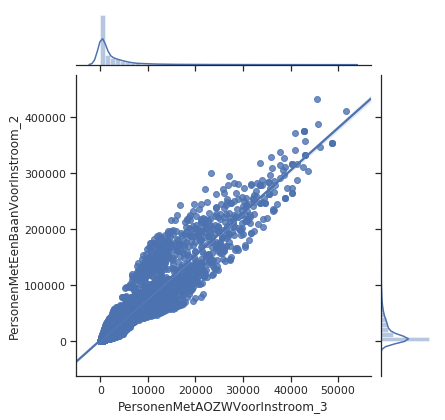

In [60]:
sns.jointplot("PersonenMetAOZWVoorInstroom_3", "PersonenMetEenBaanVoorInstroom_2", data=ds, kind='reg');

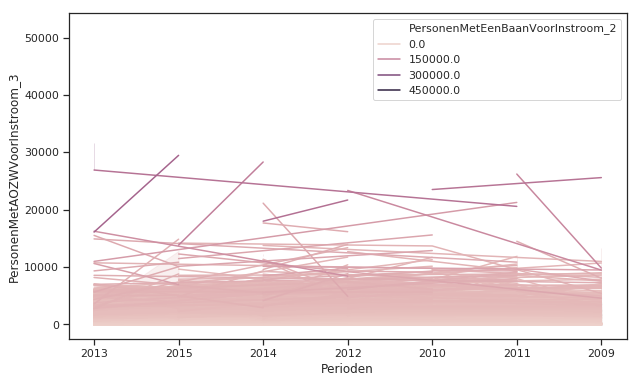

In [63]:
sns.lineplot(
        x='Perioden',
        y='PersonenMetAOZWVoorInstroom_3',
        hue='PersonenMetEenBaanVoorInstroom_2',
        data=ds)

In [80]:
list_data = [ds.loc["2009":, "PersonenMetAOZWVoorInstroom_3"], ds.loc["2009":, "PersonenMetEenBaanVoorInstroom_2"]]
ax = sns.lineplot(data=list_data)